# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [9]:
display(X.shape)
display(y.shape)
display(X)
display(y)

(70000, 784)

(70000,)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [10]:
display(X[35999])


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  16.,  29., 154.,
       254., 243., 135.,  25.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

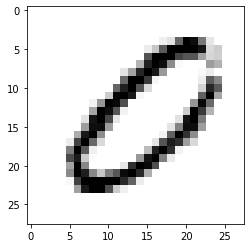

In [13]:
import matplotlib.pyplot as plt

plt.imshow(X[35999].reshape(28,28),cmap=matplotlib.cm.binary, interpolation="nearest")


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [14]:
display(y[35999])


'0'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [15]:
train_X=X[0:60000]
train_y=y[0:60000]
display(train_X.shape, train_y.shape)

test_X=X[60000:70000]
test_y=y[60000:70000]
display(test_X.shape, test_y.shape)

(60000, 784)

(60000,)

(10000, 784)

(10000,)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [16]:


train_y5=np.where(train_y=='5', True, False)          # We replace number 5 with True and the rest with False
display(train_y5.shape)

test_y5=np.where(test_y=='5', True, False)          # We replace number 5 with True and the rest with False
display(test_y5.shape)

(60000,)

(10000,)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_Xn = scaler.fit_transform(train_X)
test_Xn = scaler.fit_transform(test_X)
#train_Xn=train_X / 255
train_yn = train_y5
test_yn = test_y5

model=LogisticRegression(max_iter=3000, random_state=0)
classifier=model.fit(X=train_Xn, y=train_yn)

### Does the classifier predict correctly the 36000th digit we picked before?

In [18]:
prediction=classifier.predict(train_Xn)
display(prediction[35999])                        # the prediction of 36000th digit is correct

test_yn_pred = classifier.predict(test_Xn)
display(test_yn_pred)

False

array([False, False, False, ..., False,  True, False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()


### Now lets fit and predict on the testing set using our never 5 Classifier

In [20]:
never_5_clf.fit(X=train_Xn, y=train_yn)
never_5_clf.predict(train_Xn)

test_y5_pred=never_5_clf.predict(test_Xn)
test_y5_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

CONFUSION MATRIX FOR LOGISTICS REGRESSOR MODEL


array([[9023,   85],
       [ 142,  750]])

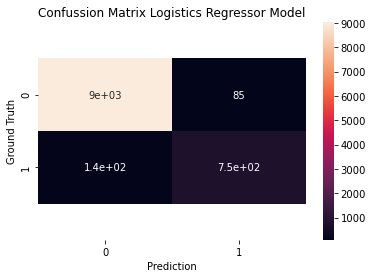

CONFUSION MATRIX FOR NEVER5CLASSIFIER MODEL


array([[9108,    0],
       [ 892,    0]])

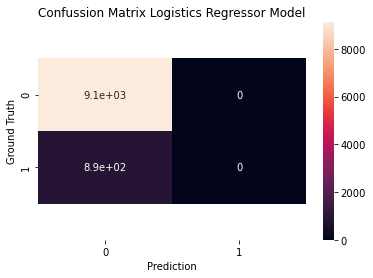

In [21]:
# Confudion matrix LogisticsRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print('CONFUSION MATRIX FOR LOGISTICS REGRESSOR MODEL')
display(confusion_matrix(test_yn, test_yn_pred))

ax = sns.heatmap(confusion_matrix(test_yn, test_yn_pred), annot=True)

b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.title('Confussion Matrix Logistics Regressor Model')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();

# Confudion matrix LogisticsRegression

print('CONFUSION MATRIX FOR NEVER5CLASSIFIER MODEL')
display(confusion_matrix(test_yn, test_y5_pred))

ax = sns.heatmap(confusion_matrix(test_yn, test_y5_pred), annot=True)

b, t = ax.get_ylim()
ax.set_ylim(b + 0.5, t - 0.5)

plt.title('Confussion Matrix Logistics Regressor Model')
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')
plt.show();


In [22]:
# Precision
from sklearn.metrics import precision_score

display('Precision of LogisticsRegression model= ', precision_score(test_yn, test_yn_pred))
display('Precision of Never5Classifier model= ', precision_score(test_yn, test_y5_pred, zero_division=0))

#When true positive + false positive == 0, like here with Never5Classifier, precision returns 0.

'Precision of LogisticsRegression model= '

0.8982035928143712

'Precision of Never5Classifier model= '

0.0

In [23]:
# Recall
from sklearn.metrics import recall_score

display('Recall of LogisticsRegression model= ', recall_score(test_yn, test_yn_pred))
display('Recall of Never5Classifier model= ', recall_score(test_yn, test_y5_pred))


'Recall of LogisticsRegression model= '

0.8408071748878924

'Recall of Never5Classifier model= '

0.0

In [24]:
# f1_score formula is the following.


$$F_{1}= 2\cdot \frac{precision\cdot recall}{precision + recall}$$

In [25]:
# That means for LogisticsRegression

F1_lr = 2*recall_score(test_yn, test_yn_pred)*precision_score(test_yn, test_yn_pred) / \
        (precision_score(test_yn, test_yn_pred)+recall_score(test_yn, test_yn_pred))

display(F1_lr)

# That means for Never5Classifier

F1_n5c = 2*recall_score(test_yn, test_y5_pred)*precision_score(test_yn, test_y5_pred) / \
        (precision_score(test_yn, test_y5_pred)+recall_score(test_yn, test_y5_pred))

# Because zero division F1_n5c is null (0)

0.8685581933989577

/home/agustin/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/agustin/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [26]:
# It is very clear. 
# The model never5classifier does not work at all, because all recall and precision and F1 are zero. There are no True Positive
# at all. Than mean tha the model does not predict anything
# The model logisticsregresion is better. It has around 0.85 value for all indicators

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

(array([0.        , 0.00933245, 1.        ]),
 array([0.        , 0.84080717, 1.        ]),
 array([2, 1, 0]))

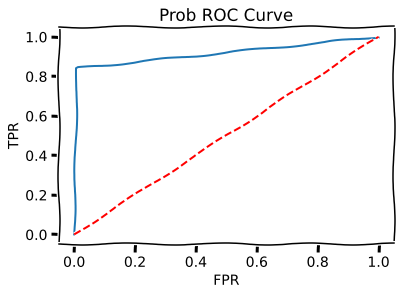

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

display(roc_curve(test_yn, test_yn_pred))                             # Logistics Regression

# wrong plot (think about threshold variation)
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(test_yn, test_yn_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve')
    plt.show();

(array([0., 1.]), array([0., 1.]), array([1, 0]))

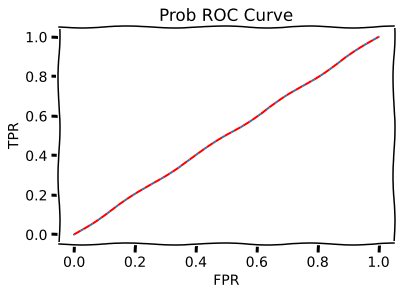

In [37]:
display(roc_curve(test_y5, test_y5_pred))                             # never5classifier

# wrong plot (think about threshold variation)
with plt.xkcd():
    fpr, tpr, thresholds = roc_curve(test_y5, test_y5_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'Prob ROC Curve')
    plt.show();

### Now find the roc_auc_score for each. 

In [39]:
print('LogisticsRegressor AUC= ',roc_auc_score(test_yn, test_yn_pred))
print('Never5Classifier AUC= ',roc_auc_score(test_y5, test_y5_pred))

LogisticsRegressor AUC=  0.9157373599516317
Never5Classifier AUC=  0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# It is very clear. The best one is LogisticsRegressor because roc_auc_score is close to 1 (1 score should be maximun score)
# On the other hand Never5Classifier is the worst because the roc_auc_score is 0.5. That means that the prediction is similar to a random prediction.